In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from numpy import load
from scipy.spatial import distance


model = keras.applications.VGG16(weights='imagenet', include_top=True)
#model.summary()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feat_extractor.summary()
images_path = '/content/drive/MyDrive/scraping'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

# load array
features = load('/content/drive/MyDrive/scraping/data.npy')


features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

def get_closest_images(query_image_idx, num_results=7):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


keeping 5059 images to analyze


5059
[0.9598338045179844, 0.9016051962971687, 1.0529920049011707, 0.8441702127456665, 1.0158805325627327, 0.967570960521698, 1.1094773933291435, 1.1521731466054916, 1.1410517394542694, 1.119215652346611, 1.0631415396928787, 1.2782523930072784, 0.9596204087138176, 1.0521810576319695, 1.1382694095373154, 0.8944021165370941, 1.048538327217102, 1.1062641069293022, 1.1214266866445541, 1.0356525890529156, 1.134438380599022, 0.8999902904033661, 1.1495857536792755, 1.0490301586687565, 1.0847976058721542, 1.0416279211640358, 0.9888658132404089, 1.109546422958374, 1.166470319032669, 0.9175237566232681, 1.0282960291951895, 0.7795272320508957, 1.01487379334867, 1.131140187382698, 1.0017047576839104, 1.1463496387004852, 0.8273123502731323, 1.084416277706623, 1.0305601712316275, 0.9058329984545708, 1.0041172737255692, 1.2323501706123352, 1.3171326220035553, 0.9913106923922896, 1.0397939682006836, 1.299641728401184, 1.1607433259487152, 1.0270102377980947, 1.0521810576319695, 1.080467477440834, 1.1480

Text(0.5, 1.0, 'result images')

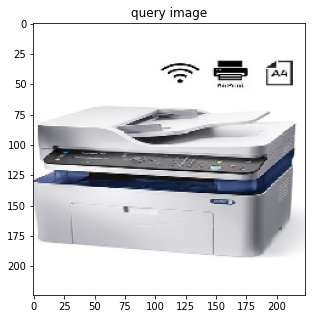

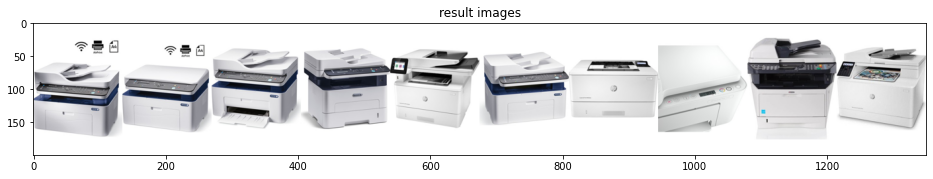

In [14]:
from scipy.spatial import distance
# load image and extract features
new_image, x = load_image("/content/drive/MyDrive/scraping/hepsiburda_printers/10051287056434.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
print(len(distances))
print(distances)

idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:10]
print(idx_closest)
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

5059
[1.2084271907806396, 1.1866809278726578, 0.8618451803922653, 1.0009650909341872, 0.9130612686276436, 1.1142909824848175, 1.2611303329467773, 0.8817824870347977, 0.845260962843895, 1.0804673582315445, 1.051445186138153, 0.7308868765830994, 0.9785280823707581, 0.9633213542401791, 0.9881184045225382, 0.9666629992425442, 1.0687482357025146, 0.5592089295387268, 0.793151929974556, 0.6900900304317474, 0.9363674372434616, 0.6076255142688751, 1.2026959359645844, 1.082078941166401, 0.7883274853229523, 0.847615584731102, 0.8528067916631699, 0.8443891108036041, 0.8391473293304443, 1.2417606711387634, 1.176197275519371, 1.1046201065182686, 1.149909034371376, 0.9405625723302364, 1.1170438900589943, 1.1785147190093994, 1.1227288320660591, 1.1582282930612564, 1.1738668233156204, 0.9535877928137779, 0.9212505221366882, 0.7028836607933044, 0.7174144089221954, 1.3120253682136536, 1.2801386415958405, 0.7231365740299225, 0.9436628483235836, 1.1229189559817314, 0.9633213542401791, 0.8737744688987732, 0

Text(0.5, 1.0, 'result images')

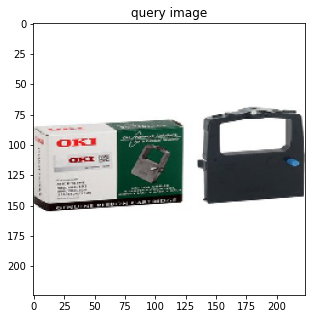

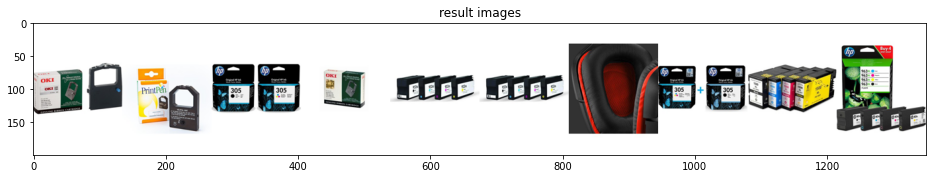

In [7]:
from scipy.spatial import distance
# load image and extract features
new_image, x = load_image("/content/drive/MyDrive/scraping/hepsiburda_printers/10270259773490.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
print(len(distances))
print(distances)

idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:10]
print(idx_closest)
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")